# 음성 데이터

#
- 파동(wave) : 압축
- 진폭(Amplitude) : intensity
- 주파수(fFrequency) : 소리 떨림의 빠르기
- 위상(phase)

- ton color
- loudnesss : 소리의 크기
- pitch : 음정 소리 높낮이, 진동수
- timber : 음색 소리 감각

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-23-05.max-800x600.png)

![](./01.png)

In [1]:
#아날로그 신호의 표본화(Sampling)
import numpy as np
import matplotlib.pyplot as plt

def single_tone(frequecy, sampling_rate=16000, duration=1):
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

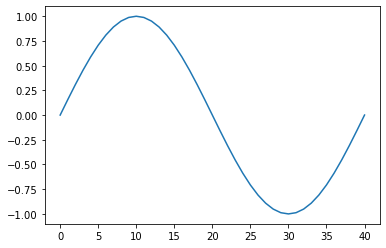

In [2]:
plt.plot(y[:41])
plt.show()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


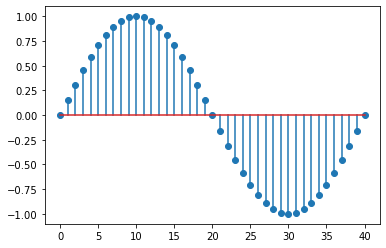

In [3]:
# 시간축 방향에서 일정 간격으로 샘플을 추출하여 이산 신호(discrete signal)로 변환시키는 과정을 표본화(Sampling)
plt.stem(y[:41])
plt.show()

## 표본화, 양자화, 부호화


- 연속적인 아날로그 신호를 컴퓨터 입력으로 넣게 되면 표본화(Sampling), 양자화(Quantizing), 부호화(Encoding)을 거쳐 이진 디지털 신호(Binary Digital Signal)로 변화시켜 인식하게 됩니다. 아래 그림은 아날로그 오디오 신호를 표본화, 양자화하는 과정을 시각화하여 보여 줍니다.

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-23-06_wVIMJrD.png)

## data download

In [4]:
!wget http://bigfile.mail.naver.com/bigfileupload/download?fid=8QbZaAIq1NKXFoMjK3YXaxbwF3YZKAUmKxgwaxulFAMqFCYwFog9FquwFxvlHrMrpxg9KAtwFAt9K6K9F4udpx0oKxFvKxCoFq+vpo+0 -O speech_wav_8000.npz

--2020-11-10 09:39:56--  http://bigfile.mail.naver.com/bigfileupload/download?fid=8QbZaAIq1NKXFoMjK3YXaxbwF3YZKAUmKxgwaxulFAMqFCYwFog9FquwFxvlHrMrpxg9KAtwFAt9K6K9F4udpx0oKxFvKxCoFq+vpo+0
Resolving bigfile.mail.naver.com (bigfile.mail.naver.com)... 125.209.234.99
접속 bigfile.mail.naver.com (bigfile.mail.naver.com)|125.209.234.99|:80... 접속됨.
HTTP request sent, awaiting response... 200 
Length: 1621257882 (1.5G) [application/octet-stream]
Saving to: ‘speech_wav_8000.npz’

speech_wav_8000.npz 100%[===================>]   1.51G  10.8MB/s    in 2m 49s  

2020-11-10 09:42:45 (9.17 MB/s) - ‘speech_wav_8000.npz’ saved [1621257882/1621257882]



In [1]:
import numpy as np
import os

data_path = os.getenv("HOME")+'/aiffel/AIFFEL_LSG/utill/speech_wav_8000.npz'
speech_data = np.load(data_path)

print("✅")

✅


In [2]:
print("Wave data shape : ", speech_data["wav_vals"].shape)
print("Label data shape : ", speech_data["label_vals"].shape)
print("✅")

Wave data shape :  (50620, 8000)
Label data shape :  (50620, 1)
✅


In [7]:
import IPython.display as ipd
import random

# 데이터 선택
rand = random.randint(0, len(speech_data["wav_vals"]))
print("rand num : ", rand)

sr = 8000 # 1초동안 재생되는 샘플의 갯수
data = speech_data["wav_vals"][rand]
print("Wave data shape : ", data.shape)
print("label : ", speech_data["label_vals"][rand])

ipd.Audio(data, rate=sr)

rand num :  25336
Wave data shape :  (8000,)
label :  ['go']


## train / test dataset set

### label date 처리

- 문자 라벨 =>


In [3]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

label_value = target_list
label_value.append('unknown')
label_value.append('silence')

new_label_value = dict()
for i, l in enumerate(label_value):
    new_label_value[l] = i
label_value = new_label_value



In [4]:

temp = []

for v in speech_data["label_vals"]:
    temp.append(label_value[v[0]])
label_data = np.array(temp)


In [5]:
new_label_value

{'yes': 0,
 'no': 1,
 'up': 2,
 'down': 3,
 'left': 4,
 'right': 5,
 'on': 6,
 'off': 7,
 'stop': 8,
 'go': 9,
 'unknown': 10,
 'silence': 11}

In [6]:
label_data

array([ 3,  3,  3, ..., 11, 11, 11])

### dataset split

In [9]:
type(speech_data["wav_vals"])

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split

sr = 8000
train_wav, test_wav, train_label, test_label = train_test_split(speech_data["wav_vals"], 
                                                                label_data, 
                                                                test_size=0.1,
                                                                shuffle=True)
print(train_wav)



[[-0.00466319 -0.00614872 -0.00563854 ... -0.00657955 -0.00703292
  -0.00730051]
 [-0.00074636 -0.00199332 -0.00204585 ... -0.00197625 -0.00149139
  -0.00148286]
 [ 0.00200761  0.00175017 -0.00229226 ...  0.0061959   0.00407032
   0.00058722]
 ...
 [ 0.00512194  0.00967875  0.00513664 ...  0.01102505  0.01168656
   0.00553414]
 [-0.00043137 -0.0024288   0.00058736 ... -0.00209512 -0.00195419
  -0.00182364]
 [ 0.00339249  0.00506347  0.00049955 ...  0.0027821   0.00202988
  -0.00180918]]


In [13]:
type(train_wav)

numpy.ndarray

In [15]:
train_wav.shape

(45558, 8000)

In [ ]:
train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])
print("✅")

In [8]:
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)
print("✅")

train data :  (45558, 8000, 1)
train labels :  (45558,)
test data :  (5062, 8000, 1)
test labels :  (5062,)
✅


## hyper - parameters set

In [14]:
batch_size = 128
max_epochs = 10

# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav'

checkpoint_dir

'/home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav'

## data setting

In [15]:
def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label
print("✅")

✅


In [16]:
import tensorflow as tf

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)
print("✅")

<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
✅


## model

In [17]:
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8000, 32)          320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8000, 32)          9248      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4000, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          18496     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4000, 64)          36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 64)         

## loss

In [18]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])
print("✅")

✅


## trainning

In [19]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)
print("✅")

✅


In [20]:
#30분 내외 소요
history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )
print("✅")

Epoch 1/10
355/355 [==============================] - ETA: 0s - loss: 1.4330 - accuracy: 0.5294
Epoch 00001: val_loss improved from inf to 1.22914, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav
355/355 [==============================] - 152s 427ms/step - loss: 1.4330 - accuracy: 0.5294 - val_loss: 1.2291 - val_accuracy: 0.6494
Epoch 2/10
355/355 [==============================] - ETA: 0s - loss: 0.8152 - accuracy: 0.7546
Epoch 00002: val_loss improved from 1.22914 to 0.72890, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav
355/355 [==============================] - 154s 433ms/step - loss: 0.8152 - accuracy: 0.7546 - val_loss: 0.7289 - val_accuracy: 0.7837
Epoch 3/10
355/355 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.8265
Epoch 00003: val_loss improved from 0.72890 to 0.56428, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav
355/3

## 학습 결과

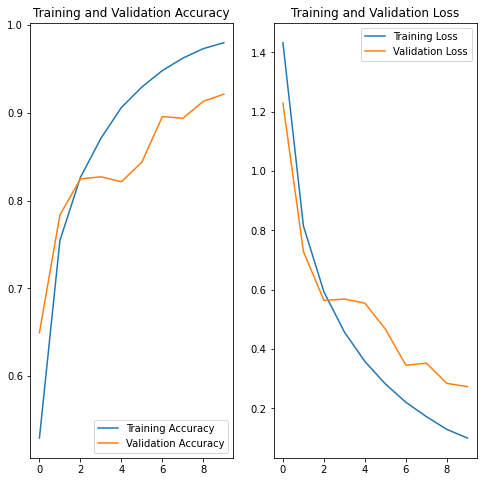

✅


In [21]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

## 평가

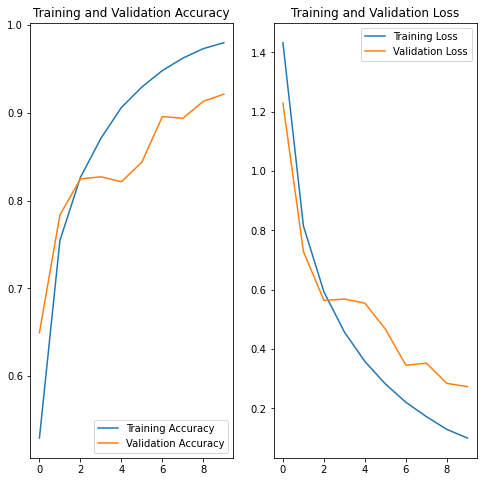

✅


In [22]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

In [23]:
results = model_wav.evaluate(test_dataset)
print("✅")

40/40 [==============================] - 7s 164ms/step - loss: 0.2725 - accuracy: 0.9214
✅


In [24]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))
print("✅")

loss value: 0.273
accuracy value: 92.1375%
✅


## model test

In [25]:
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  up


In [26]:
if np.argmax(y_pred_) == test_label[i]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
print("✅")

y_pred: up
✅


## skip-connetion model

- conv1d 사용

In [27]:
input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav_skip = tf.keras.Model(input_tensor, output_tensor)

model_wav_skip.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 8000, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 8000, 32)     9248        conv1d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 4000, 32)     0           conv1d_11[0][0]                  
_______________________________________________________________________________________

In [28]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav_skip.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])
print("✅")

✅


In [29]:
# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav_skip'


cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)
print("✅")

✅


In [30]:
#30분 내외 소요
history_wav_skip = model_wav_skip.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )
print("✅")

Epoch 1/10
355/355 [==============================] - ETA: 0s - loss: 1.3112 - accuracy: 0.5815
Epoch 00001: val_loss improved from inf to 1.18370, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav_skip
355/355 [==============================] - 168s 474ms/step - loss: 1.3112 - accuracy: 0.5815 - val_loss: 1.1837 - val_accuracy: 0.7037
Epoch 2/10
355/355 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.7952
Epoch 00002: val_loss improved from 1.18370 to 0.70063, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint/wav_skip
355/355 [==============================] - 170s 478ms/step - loss: 0.7139 - accuracy: 0.7952 - val_loss: 0.7006 - val_accuracy: 0.7941
Epoch 3/10
355/355 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.8778
Epoch 00003: val_loss improved from 0.70063 to 0.65816, saving model to /home/aiffel0042/aiffel/AIFFEL_LSG/utill/speech_recognition/checkpoint

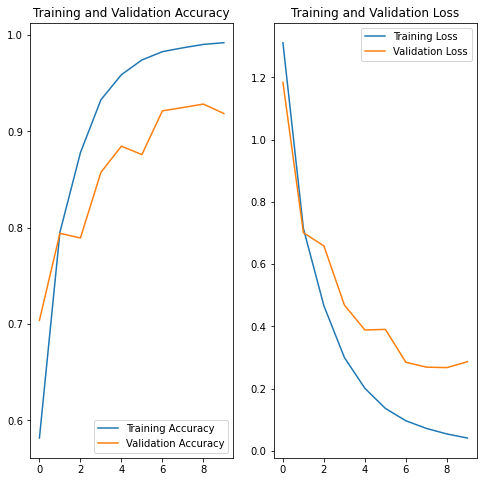

✅


In [31]:
import matplotlib.pyplot as plt

acc = history_wav_skip.history['accuracy']
val_acc = history_wav_skip.history['val_accuracy']

loss=history_wav_skip.history['loss']
val_loss=history_wav_skip.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

In [32]:
# Evaluation 

model_wav_skip.load_weights(checkpoint_dir)
results = model_wav_skip.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))
print("✅")

40/40 [==============================] - 5s 132ms/step - loss: 0.2665 - accuracy: 0.9285
loss value: 0.266
accuracy value: 92.8487%
✅


In [35]:
# Test 

inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav_skip(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  left


In [34]:
if np.argmax(y_pred_) == test_label[i]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]))
print("✅")

y_pred: go
✅


## Spectrogram
- 푸리에변한
- 오일러 공식 (지수함수와 주기함수와의 관계)
- STFT(Short Time Fourier Transform)

#### library install

In [36]:
! pip install librosa

     |████████████████████████████████| 183 kB 539 kB/s eta 0:00:01
     |████████████████████████████████| 377 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.7 MB/s  eta 0:00:01
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201374 sha256=bfb2107d899f63c6b73f20bcbfab9b254df17d195748304130dd8063f8ec3b96
  Stored in directory: /home/aiffel0042/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23142 sha256=2f61d4dd8cdcc2c49cef78bc0599bbd75ca3cb9cc55dcb40c40eef5ed67a05ac
  Stored in directory: /home/aiffel0042/.cache/pip/wheels/ba/7b/eb/213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320720 sha256=27149ef7e4c29f08d95662a2b1cf6ae82e9f675834e1ac7acb0a51cfe6bcfc20
  Stored in directory: /home/a

In [37]:
import librosa

def wav2spec(wav, fft_size=258): # spectrogram shape을 맞추기위해서 size 변형
    D = np.abs(librosa.stft(wav, n_fft=fft_size))
    return D
print("✅")

✅


In [38]:
# 위에서 뽑았던 sample data
spec = wav2spec(data)
print("Waveform shape : ",data.shape)
print("Spectrogram shape : ",spec.shape)

Waveform shape :  (8000,)
Spectrogram shape :  (130, 126)


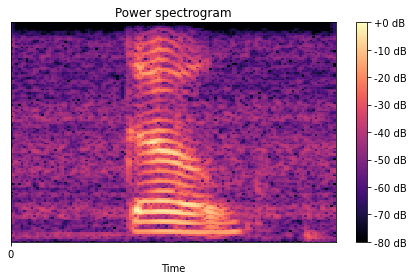

In [39]:
import librosa.display

librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

In [40]:
data

array([ 0.00351836,  0.0049913 ,  0.00095164, ...,  0.00227842,
        0.00283057, -0.00136095], dtype=float32)